<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/matusiak/system_rekomendacyjny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
grocery_data = pd.read_csv('GroceryStoreDataSet.csv', names=["products_list"])
grocery_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,products_list
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [20]:
grocery_data['products_list'] = grocery_data['products_list'].str.replace('COCK', 'COKE').str.replace('SUGER', 'SUGAR')
products_structured = grocery_data['products_list'].apply(lambda x: x.split(','))

trans_encoder = TransactionEncoder()
encoded_products = trans_encoder.fit(products_structured).transform(products_structured)
encoded_df = pd.DataFrame(encoded_products, columns=trans_encoder.columns_).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# zbiory częste
frequent_item_sets = apriori(encoded_df, min_support=0.15, use_colnames=True)

# reguły asocjacyjne
assoc_rules = association_rules(frequent_item_sets, metric="confidence", min_threshold=0.1)

# para produktów o największej ufności reguły
highest_conf_rule = assoc_rules[assoc_rules['confidence'] == assoc_rules['confidence'].max()].head(1)
print("Para produktów o największej ufności reguły:")
print(highest_conf_rule)

# para produktów o największym lift
assoc_rules = association_rules(frequent_item_sets, metric="lift", min_threshold=0.1)
highest_lift_rule = assoc_rules[assoc_rules['lift'] == assoc_rules['lift'].max()].head(1)
print("Para produktów o największym lift:")
print(highest_lift_rule)

Para produktów o największej ufności reguły:
   antecedents consequents  antecedent support  consequent support  support  \
17      (COKE)    (COFFEE)                0.15                 0.4     0.15   

    confidence  lift  leverage  conviction  zhangs_metric  
17         1.0   2.5      0.09         inf       0.705882  
Para produktów o największym lift:
   antecedents consequents  antecedent support  consequent support  support  \
17      (COKE)    (COFFEE)                0.15                 0.4     0.15   

    confidence  lift  leverage  conviction  zhangs_metric  
17         1.0   2.5      0.09         inf       0.705882  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


----------

In [22]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
ratings_data = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies_data = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

print("Brakujące wartości w ocenach:\n", ratings_data.isnull().sum())
print("Brakujące wartości w filmach:\n", movies_data.isnull().sum())

# statystyki dotyczące ocen i filmów
print("Oceny: ", ratings_data['rating'].nunique(), sorted(ratings_data['rating'].unique()))
print("Liczba ocen: ", ratings_data.shape[0])
print("Liczba filmów: ", movies_data['movieId'].nunique(), ", Unikalne tytuły: ", movies_data['title'].nunique())
print("Liczba ocenionych filmów: ", movies_data['movieId'].nunique())
print("Liczba użytkowników: ", ratings_data['userId'].nunique(), ", Najwyższe ID: ", ratings_data['userId'].max())
print("Średnia liczba ocen na użytkownika: ", round(ratings_data.shape[0] / ratings_data['userId'].nunique(), 2))
print("Średnia liczba ocen na film: ", round(ratings_data.shape[0] / ratings_data['movieId'].nunique(), 2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Brakujące wartości w ocenach:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Brakujące wartości w filmach:
 movieId    0
title      0
genres     0
dtype: int64
Oceny:  10 [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
Liczba ocen:  100836
Liczba filmów:  9742 , Unikalne tytuły:  9737
Liczba ocenionych filmów:  9742
Liczba użytkowników:  610 , Najwyższe ID:  610
Średnia liczba ocen na użytkownika:  165.3
Średnia liczba ocen na film:  10.37


In [24]:
# analiza zduplikowanych tytułów filmów
film_titles = list(movies_data['title'])
duplicates = set([x for x in film_titles if film_titles.count(x) > 1])
print("Zduplikowane tytuły filmów:")
for duplicate in duplicates:
    print("  -", duplicate)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Zduplikowane tytuły filmów:
  - Confessions of a Dangerous Mind (2002)
  - Emma (1996)
  - War of the Worlds (2005)
  - Saturn 3 (1980)
  - Eros (2004)


In [25]:
# średnia bayesowska
C = ratings_data.shape[0] / ratings_data['movieId'].nunique()
m = ratings_data['rating'].sum() / ratings_data.shape[0]
print("C: ", C, ", m: ", m)

def bayesian_average(ratings):
    bayesian_avg = (C * m + ratings.sum()) / (C + ratings.count())
    return bayesian_avg

bayesian_avg_ratings = ratings_data.groupby('movieId')['rating'].agg(bayesian_average).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_statistics = pd.merge(movies_data, bayesian_avg_ratings, on='movieId')
print(movie_statistics.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:  10.369806663924312 , m:  3.501556983616962
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  bayesian_avg  
0  Adventure|Animation|Children|Comedy|Fantasy      3.901634  
1                   Adventure|Children|Fantasy      3.437826  
2                               Comedy|Romance      3.299841  
3                         Comedy|Drama|Romance      3.040360  
4                                       Comedy      3.146557  


In [26]:
# macierz rzadka
def create_sparse_matrix(df):
    M = df['userId'].nunique()
    N = df['movieId'].nunique()
    user_map = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_map = dict(zip(np.unique(df["movieId"]), list(range(N))))
    user_inv_map = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_map = dict(zip(list(range(N)), np.unique(df["movieId"])))
    user_idx = [user_map[i] for i in df['userId']]
    item_idx = [movie_map[i] for i in df['movieId']]
    X = csr_matrix((df["rating"], (user_idx, item_idx)), shape=(M, N))
    return X, user_map, movie_map, user_inv_map, movie_inv_map

X, user_map, movie_map, user_inv_map, movie_inv_map = create_sparse_matrix(ratings_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# znajdowanie podobnych filmów
def get_similar_movies(movie_id, X, movie_map, movie_inv_map, k, metric='cosine'):
    X = X.T
    neighbor_ids = []
    movie_index = movie_map[movie_id]
    movie_vector = X[movie_index]
    if isinstance(movie_vector, (np.ndarray)):
        movie_vector = movie_vector.reshape(1, -1)
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbors = kNN.kneighbors(movie_vector, return_distance=False)
    for i in range(1, k+1):
        n = neighbors[0, i]
        neighbor_ids.append(movie_inv_map[n])
    return neighbor_ids

toy_story_movie_id = movies_data[movies_data['title'].str.contains('Toy Story \(')]['movieId'].iloc[0]
similar_movies_list = get_similar_movies(toy_story_movie_id, X, movie_map, movie_inv_map, k=10, metric='cosine')
print(f"Najbardziej podobne filmy (Id): {toy_story_movie_id}: {similar_movies_list}")
print(f"Najbardziej podobne filmy (Title): {list(movies_data[movies_data['movieId']==toy_story_movie_id]['title'])}:")
print(movies_data[movies_data['movieId'].isin(similar_movies_list)]['title'])

Najbardziej podobne filmy (Id): 1: [3114, 480, 780, 260, 356, 364, 1210, 648, 1265, 1270]
Najbardziej podobne filmy (Title): ['Toy Story (1995)']:
224             Star Wars: Episode IV - A New Hope (1977)
314                                   Forrest Gump (1994)
322                                 Lion King, The (1994)
418                                  Jurassic Park (1993)
546                            Mission: Impossible (1996)
615                  Independence Day (a.k.a. ID4) (1996)
911     Star Wars: Episode VI - Return of the Jedi (1983)
964                                  Groundhog Day (1993)
969                             Back to the Future (1985)
2355                                   Toy Story 2 (1999)
Name: title, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:17: DeprecationWarning: invalid escape sequence '\('
<>:17: DeprecationWarning: invalid escape sequence '\('
<ipython-input-28-38f2362eebf2>:17: DeprecationWarning: invalid escape sequence '\('
  toy_story_movie_id = movies_data[movies_data['title'].str.contains('Toy Story \(')]['movieId'].iloc[0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Liczba filmów dla dzieci: 664
Rozkład ocen filmów z 1995 roku:
rating
0.5      50
1.0     254
1.5      75
2.0     522
2.5     244
3.0    1701
3.5     467
4.0    1625
4.5     308
5.0     898
Name: count, dtype: int64


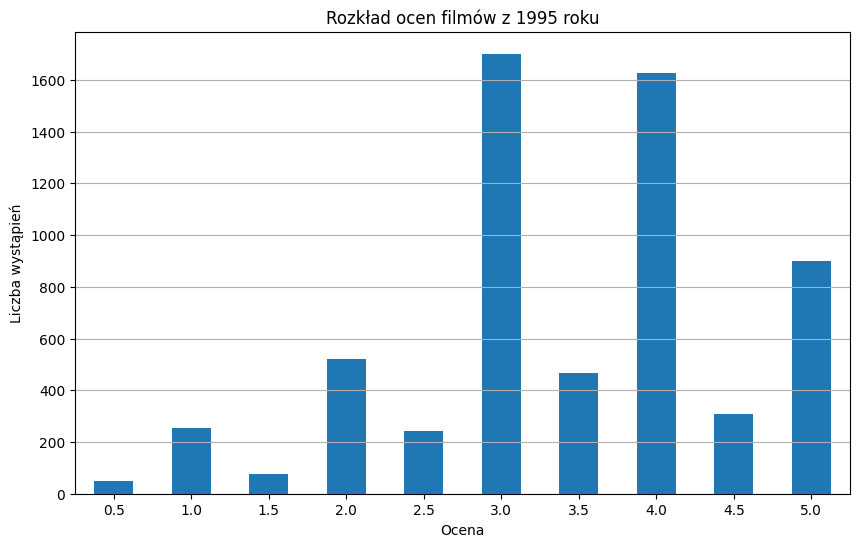

Średnia ocen filmów akcji: 3.447984331646809
Trzy najwyżej oceniane filmy akcji:
title
Knock Off (1998)                                                      5.0
On the Other Side of the Tracks (De l'autre côté du périph) (2012)    5.0
Sonatine (Sonachine) (1993)                                           5.0
Name: rating, dtype: float64


In [29]:
# przegląd danych
movies_data['genres'] = movies_data['genres'].str.lower()
movies_data['year'] = movies_data['title'].str.extract(r'(\(\d{4}\))', expand=False)
children_movies_count = movies_data[movies_data['genres'].str.contains('children')].shape[0]
print("Liczba filmów dla dzieci:", children_movies_count)

ratings_data['rating_year'] = pd.to_datetime(ratings_data['timestamp'], unit='s').dt.year
ratings_merged = ratings_data.merge(movies_data, on='movieId', how='inner')
ratings_1995 = ratings_merged[ratings_merged['year'] == '(1995)']
ratings_distribution_1995 = ratings_1995['rating'].value_counts().sort_index()
print("Rozkład ocen filmów z 1995 roku:")
print(ratings_distribution_1995)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ratings_distribution_1995.plot(kind='bar')
plt.title('Rozkład ocen filmów z 1995 roku')
plt.xlabel('Ocena')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

action_movies_data = ratings_merged[ratings_merged['genres'].str.contains('action', case=False)]
average_rating_action_movies = action_movies_data['rating'].mean()
print(f"Średnia ocen filmów akcji: {average_rating_action_movies}")
print("Trzy najwyżej oceniane filmy akcji:")
print(action_movies_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(3))


SURPRISE

In [35]:
!pip install surprise

import pandas as pd
import time
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, GridSearchCV, train_test_split
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
ratings_data = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')

min_rating_value = ratings_data.rating.min()
max_rating_value = ratings_data.rating.max()

reader = Reader(rating_scale=(min_rating_value, max_rating_value))
data = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# SVD
start_time_svd_train = time.time()
algo_svd = SVD()
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)
accuracy.rmse(predictions_svd)
end_time_svd_train = time.time()

param_grid_svd = {'n_factors': [1, 2, 5, 10, 50]}
start_time_svd = time.time()
grid_search_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse'], cv=5, n_jobs=-1)
grid_search_svd.fit(data)
end_time_svd = time.time()

best_svd_params = grid_search_svd.best_params
best_svd = grid_search_svd.best_estimator['rmse']

cv_results_svd = cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.8816
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8695  0.8684  0.8697  0.8639  0.8758  0.8695  0.0038  
MAE (testset)     0.6663  0.6676  0.6660  0.6676  0.6736  0.6682  0.0028  
Fit time          0.73    0.77    0.80    0.78    1.05    0.82    0.12    
Test time         0.12    0.28    0.17    0.12    0.21    0.18    0.06    


In [38]:
# kNN
start_time_knn_train = time.time()
algo_knn = KNNBasic()
algo_knn.fit(trainset)
predictions_knn = algo_knn.test(testset)
accuracy.rmse(predictions_knn)
end_time_knn_train = time.time()

param_grid_knn = {'k': [1, 2, 5, 10, 20, 30, 40, 50]}
start_time_knn = time.time()
grid_search_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['rmse'], cv=5, n_jobs=-1)
grid_search_knn.fit(data)
end_time_knn = time.time()

best_knn_params = grid_search_knn.best_params
best_knn = grid_search_knn.best_estimator['rmse']

cv_results_knn = cross_validate(best_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.9577
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9250  0.9443  0.9462  0.9405  0.9433  0.9399  0.0076  
MAE (testset)     0.7052  0.7200  0.7203  0.7155  0.7187  0.7159  0.0056  
Fit time          0.12    0.14    0.15    0.14    0.19    0.15    0.02    
Test time         1.08    1.26    1.11    1.37    1.89    1.34    0.29    


In [39]:
# kNN Baseline
algo_knn_baseline = KNNBaseline()
algo_knn_baseline.fit(trainset)
predictions_knn_baseline = algo_knn_baseline.test(testset)
accuracy.rmse(predictions_knn_baseline)

Estimating biases using als...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8810


0.8810132496591062

In [40]:
# czasy walidacji krzyżowej
start_time_knn_cross = time.time()
cross_val_knn = cross_validate(best_knn, data, measures=['rmse'], cv=5, verbose=True)
end_time_knn_cross = time.time()

start_time_svd_cross = time.time()
cross_val_svd = cross_validate(best_svd, data, measures=['rmse'], cv=5, verbose=True)
end_time_svd_cross = time.time()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9425  0.9398  0.9405  0.9435  0.9365  0.9406  0.0024  
Fit time          0.15    0.15    0.15    0.15    0.15    0.15    0.00    
Test time         1.31    1.28    1.12    1.28    1.33    1.26    0.07    
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8676  0.8627  0.8767  0.8665  0.8732  0.8693  0.0050  
Fit time          1.12    1.03    0.77    0.78    0.78    0.89    0.15    
Test ti

In [41]:
print(f"\nNajlepszy KNN RMSE: {grid_search_knn.best_score['rmse']}")
print(f"Najlepszy SVD RMSE: {grid_search_svd.best_score['rmse']}")
print(f"\nNajlepsze parametry KNN: {grid_search_knn.best_params['rmse']}")
print(f"Najlepsze parametry SVD: {grid_search_svd.best_params['rmse']}")
print(f"\nCzas trenowania hiperparametrów KNN: {end_time_knn - start_time_knn} sekund")
print(f"Czas trenowania hiperparametrów SVD: {end_time_svd - start_time_svd} sekund")
print(f"\nCzas trenowania KNN (cross-validation): {end_time_knn_cross - start_time_knn_cross} sekund")
print(f"Czas trenowania SVD (cross-validation): {end_time_svd_cross - start_time_svd_cross} sekund")
print(f"\nCzas trenowania SVD: {end_time_svd_train - start_time_svd_train} sekund")
print(f"Czas trenowania KNN: {end_time_knn_train - start_time_knn_train} sekund")
print(f"\nWyniki walidacji krzyżowej KNN: {cv_results_knn}")
print(f"Wyniki walidacji krzyżowej SVD: {cv_results_svd}")


Najlepszy KNN RMSE: 0.9401366736656034
Najlepszy SVD RMSE: 0.8691068227984247

Najlepsze parametry KNN: {'k': 10}
Najlepsze parametry SVD: {'n_factors': 10}

Czas trenowania hiperparametrów KNN: 45.81804037094116 sekund
Czas trenowania hiperparametrów SVD: 34.83514332771301 sekund

Czas trenowania KNN (cross-validation): 7.9716503620147705 sekund
Czas trenowania SVD (cross-validation): 6.62999701499939 sekund

Czas trenowania SVD: 8.209537744522095 sekund
Czas trenowania KNN: 2.387096881866455 sekund

Wyniki walidacji krzyżowej KNN: {'test_rmse': array([0.92499936, 0.94432379, 0.94615581, 0.94051792, 0.94327015]), 'test_mae': array([0.70520087, 0.72000368, 0.7203174 , 0.71548725, 0.7186724 ]), 'fit_time': (0.11924266815185547, 0.142730712890625, 0.14731979370117188, 0.14405083656311035, 0.19446468353271484), 'test_time': (1.0794198513031006, 1.2614662647247314, 1.1111576557159424, 1.3695733547210693, 1.8931875228881836)}
Wyniki walidacji krzyżowej SVD: {'test_rmse': array([0.86946445,

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
